In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
# Load cycle_df dataset
cycle_df = pd.read_csv("../data/cycle_df.csv")
cycle_df.head(5).append(cycle_df.tail(5))

TotalTime                        Phase  PhaseTime        Vel       Acc  \
0           236  artemis_motor130_Motorway 1         60  30.333333  0.694444   
1           237  artemis_motor130_Motorway 1         61  31.027778  0.416667   
2           238  artemis_motor130_Motorway 1         62  31.444444  0.666667   
3           239  artemis_motor130_Motorway 1         63  32.111111  0.555556   
4           240  artemis_motor130_Motorway 1         64  32.666667  0.694444   
8075       8881    wltp_class3b_Extra-high 3        319   0.000000  0.000000   
8076       8882    wltp_class3b_Extra-high 3        320   0.000000  0.000000   
8077       8883    wltp_class3b_Extra-high 3        321   0.000000  0.000000   
8078       8884    wltp_class3b_Extra-high 3        322   0.000000  0.000000   
8079       8885    wltp_class3b_Extra-high 3        323   0.000000  0.000000   

      5_sec_Vel_mean  5_sec_Acc_mean  10_sec_Vel_mean  10_sec_Acc_mean  \
0           18.68879         0.13147         18.68879          0.13147   
1           18.74086         0.13268         18.74086          0.13268   
2           18.79423         0.13492         18.79423          0.13492   
3           18.84995         0.13668         18.84995          0.13668   
4           18.90752         0.13900         18.90752          0.13900   
8075        12.94729         0.00000         12.94729          0.00000   
8076        12.94009         0.00000         12.94009          0.00000   
8077        12.93289         0.00000         12.93289          0.00000   
8078        12.92571         0.00000         12.92571          0.00000   
8079        12.91853         0.00000         12.91853          0.00000   

      30_sec_Vel_mean  30_sec_Acc_mean  60_sec_Vel_mean  60_sec_Acc_mean  \
0            18.68879          0.13147         18.68879          0.13147   
1            18.74086          0.13268         18.74086          0.13268   
2            18.79423          0.13492         18.79423          0.13492   
3            18.84995          0.13668         18.84995          0.13668   
4            18.90752          0.13900         18.90752          0.13900   
8075         12.94729          0.00000         12.94729          0.00000   
8076         12.94009          0.00000         12.94009          0.00000   
8077         12.93289          0.00000         12.93289          0.00000   
8078         12.92571          0.00000         12.92571          0.00000   
8079         12.91853          0.00000         12.91853          0.00000   

      30_sec_Acc_min  30_sec_Acc_max  60_sec_Acc_min  60_sec_Acc_max  \
0           -2.41667         1.86111        -2.41667         1.86111   
1           -2.41667         1.86111        -2.41667         1.86111   
2           -2.41667         1.86111        -2.41667         1.86111   
3           -2.41667         1.86111        -2.41667         1.86111   
4           -2.41667         1.86111        -2.41667         1.86111   
8075        -1.50000         1.66667        -1.50000         1.66667   
8076        -1.50000         1.66667        -1.50000         1.66667   
8077        -1.50000         1.66667        -1.50000         1.66667   
8078        -1.50000         1.66667        -1.50000         1.66667   
8079        -1.50000         1.66667        -1.50000         1.66667   

      60_sec_Vel_iddle_count  
0                        0.0  
1                        0.0  
2                        0.0  
3                        0.0  
4                        0.0  
8075                     2.0  
8076                     3.0  
8077                     4.0  
8078                     5.0  
8079                     6.0

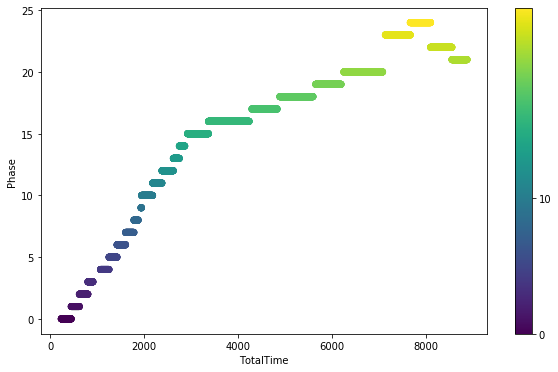

In [3]:
le = preprocessing.LabelEncoder()
le.fit(cycle_df.Phase.drop_duplicates())
cycle_df.Phase = le.transform(cycle_df.Phase)


x=0;y=1;
# change x and y values to see scatter plots of different features

plt.figure(figsize=(10, 6))
plt.scatter(cycle_df.iloc[:, x], cycle_df.iloc[:, y],c=cycle_df.Phase)
plt.colorbar(ticks=[0, 10])
plt.xlabel(cycle_df.columns[x]);
plt.ylabel(cycle_df.columns[y]);


In [4]:
!pip install sns

In [5]:
import seaborn as sns

count    8080.000000
mean       15.468069
std         6.583387
min         0.000000
25%        12.000000
50%        17.000000
75%        20.000000
max        24.000000
Name: Phase, dtype: float64


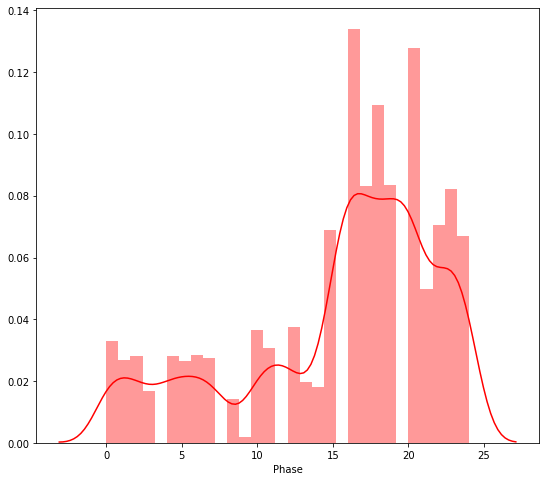

In [6]:
print(cycle_df['Phase'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(cycle_df['Phase'], color='r', bins=30, hist_kws={'alpha': 0.4});

In [7]:
train_df = cycle_df.copy()

In [8]:
train_df = train_df.drop({'Phase', 'TotalTime'}, axis=1)
train_df.head(2)

PhaseTime        Vel       Acc  5_sec_Vel_mean  5_sec_Acc_mean  \
0         60  30.333333  0.694444        18.68879         0.13147   
1         61  31.027778  0.416667        18.74086         0.13268   

   10_sec_Vel_mean  10_sec_Acc_mean  30_sec_Vel_mean  30_sec_Acc_mean  \
0         18.68879          0.13147         18.68879          0.13147   
1         18.74086          0.13268         18.74086          0.13268   

   60_sec_Vel_mean  60_sec_Acc_mean  30_sec_Acc_min  30_sec_Acc_max  \
0         18.68879          0.13147        -2.41667         1.86111   
1         18.74086          0.13268        -2.41667         1.86111   

   60_sec_Acc_min  60_sec_Acc_max  60_sec_Vel_iddle_count  
0        -2.41667         1.86111                     0.0  
1        -2.41667         1.86111                     0.0

In [9]:
#make an array of min_samples_leaf to choose from 1 to 100
num_leafs = [1, 2, 3, 4, 5, 7, 10, 20, 50, 100]

In [10]:
y = cycle_df.Phase

In [11]:
train_df.shape

(8080, 16)

In [12]:
X = train_df.iloc[:,1:16]

In [13]:
X.head()

Vel       Acc  5_sec_Vel_mean  5_sec_Acc_mean  10_sec_Vel_mean  \
0  30.333333  0.694444        18.68879         0.13147         18.68879   
1  31.027778  0.416667        18.74086         0.13268         18.74086   
2  31.444444  0.666667        18.79423         0.13492         18.79423   
3  32.111111  0.555556        18.84995         0.13668         18.84995   
4  32.666667  0.694444        18.90752         0.13900         18.90752   

   10_sec_Acc_mean  30_sec_Vel_mean  30_sec_Acc_mean  60_sec_Vel_mean  \
0          0.13147         18.68879          0.13147         18.68879   
1          0.13268         18.74086          0.13268         18.74086   
2          0.13492         18.79423          0.13492         18.79423   
3          0.13668         18.84995          0.13668         18.84995   
4          0.13900         18.90752          0.13900         18.90752   

   60_sec_Acc_mean  30_sec_Acc_min  30_sec_Acc_max  60_sec_Acc_min  \
0          0.13147        -2.41667         1.86111        -2.41667   
1          0.13268        -2.41667         1.86111        -2.41667   
2          0.13492        -2.41667         1.86111        -2.41667   
3          0.13668        -2.41667         1.86111        -2.41667   
4          0.13900        -2.41667         1.86111        -2.41667   

   60_sec_Acc_max  60_sec_Vel_iddle_count  
0         1.86111                     0.0  
1         1.86111                     0.0  
2         1.86111                     0.0  
3         1.86111                     0.0  
4         1.86111                     0.0

In [14]:
X = train_df.iloc[:,1:16]
y = cycle_df.iloc[:,2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=4)

In [15]:
#GridSearch to determine best parameters
param_grid = {
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size':num_leafs,
    'weights' : ['uniform', 'distance'],
    'metric' : ['euclidean', 'manhattan', 'chebyshev', 'minkowski'],
}


In [16]:

gsm = GridSearchCV(KNeighborsClassifier(),
                                 param_grid=param_grid,
                                 verbose = 1,
                                 cv=5,
                                 n_jobs = -1,
                                 refit=True)

In [17]:
now = datetime.now()
print(now)
gsm_result = gsm.fit(X_train, y_train)
end = datetime.now()
print(end)
print(end-now)

2020-11-11 21:32:00.999097
Fitting 5 folds for each of 320 candidates, totalling 1600 fits


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/model_selection/_split.py:672: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done 1218 tasks      | elapsed:   18.8s


2020-11-11 21:32:34.715308
0:00:33.716211


[Parallel(n_jobs=-1)]: Done 1600 out of 1600 | elapsed:   33.6s finished


In [18]:
print(gsm.best_score_)

0.002612818294833071


In [19]:
best_params_ = gsm.best_params_
best_params_

{'algorithm': 'ball_tree',
 'leaf_size': 20,
 'metric': 'chebyshev',
 'weights': 'distance'}

In [20]:
print(gsm.best_estimator_)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=20, metric='chebyshev',
                     weights='distance')


In [21]:
n_neighbors = [1,3,5,7,9]

KNN for k =  1
[729 176  10 291 567  88 586 190 881 412 150 356 281 309 114 193 175 775
 353 211  91 134 521 121 448   9  70  97 138 291 694   8 214 736 401 103
 231 155 150 303 141 173 393 364 699 179 114 103 160  56  61 207 717 344
 344 658  86  65 481 748  52  30 154 200 374   9  68 179 561  17  78 379
  66  80 297  40  25  99 166 113 375 817 407 121 243 520  67  67 175 557
 448  67 414 403 136 178 136 355 700 488 212  35  33  30 282  85 119 183
 462 133 499 369 579 241 306 561 244  73 214  21 233 461 410  25 498  83
 280 273 739  69 575 143 477 558 552 171   5  47 308 372 369  94 263  32
  80 267   4 501 420 270 243 305 150  55 762 181 541  72  59 418 275 342
 163 463 281 397 433  18 632 167 349 542 503 167 444  84 165 202 106  24
 237 365 389  39  32 193  43 605 554  64 117 756 644 397 213 324  59 846
  40 220 216 218  86  62 306 300   1 132   8 298 653  69  71 294 164  61
 104 219  71 291 456  21 190 312 124 344  68 101 461 599 103 418  89 102
 146  89  81  96 263 165  72  90 141

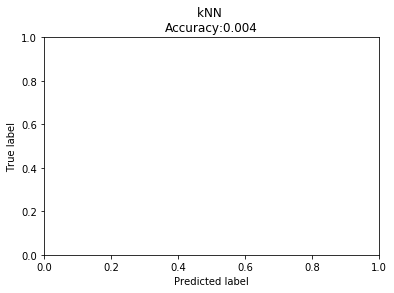

KNN for k =  3
[729 175  10 291 567  70 584 190 881 410 150 356 281 309 114 193 175 775
 353 211  91 134 521 121 448   9  70  97 138 291 694   8 214 736 401 103
 231 155 150 303 141 173 393 364 699 179 109 103   4  56  61 207 670 344
 344 658  86  65 481 748  52  30 154 200 374   9  68 179 561  17  78 379
  64  80 297  40  23  99 166 113 375 817 407 121 243 520  67  67 175 557
 448  67 414 403 136 178 136 355 700 488 212  35  33  30 282  85 119 183
 462 133 499 369 579 241 306 561 244  73 214  21 233 461 410  25 404  83
 280 273 739  69 575 143 477 558 552 171   5  46 308 372 369  94 263  32
  80 267   4 501 420 270 241 305 150  55 761 181 541  72  59 418 275 342
 163 463 281 397 431  18 632 167 349 542 503 167 102  84 165 202 106  24
 237 365 389  35  32 191  43 605 554  64 114 756 644 397 211 324  59 846
  40 220 216 218  86  62 306 300   1 132   8 298 653  67  68 294 164  61
 104 219  71 291 456  21 190 312 124 344  68 101 461 599 103 418  89 102
 146  89  81  96 263 165  72  90 141

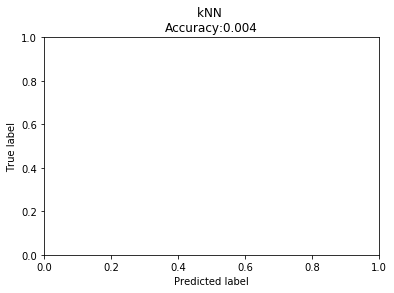

KNN for k =  5
[729 175  10 291 567  70 584 190 881 410 150 356 281 309 114 193 175 775
 353 211  91 134 521 121 448   9  70  97 138 291 694   8 214 736 401 103
 231 155 150 303 141 173 393 364 699 179 109 103   4  56  61 205 670 344
 344 658  86  65 481 748  52  30 154 200 374   9  68 179 561  17  78 379
  64  80 297  40  23  99 166 113 375 817 407 121 243 520  67  67 175 557
 448  67 414 403 136 178 136 355 700 488 212  35  33  30 282  85 119 183
 462 133 499 369 579 241 306 561 244  73 214  21 233 461 410  25 402  83
 280 273 739  69 575 143 477 558 552 171   5  38 308 372 369  94 263  32
  80 267   4 501 420 270 241 305 150  55 761 181 541  72  59 418 275 342
 163 463 281 397 431  18 632 167 349 542 503 169 102  84 165 202 106  24
 237 365 389  35  32 191  43 605 554  64 114 756 644 397 211 324  59 846
  40 220 216 218  86  62 306 300   1 132   8 298 653  67  68 294 164  61
 104 219  71 291 456  21 190 312 124 344  68 101 461 599 103 418  89 102
 146  89  81  96 263 165  72  90 141

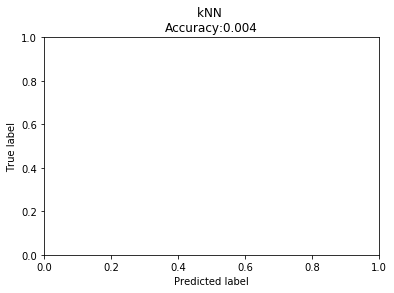

KNN for k =  7
[729 175  10 291 567  70 584 190 881 410 150 356 281 309 114 193 175 775
 353 211  91 134 521 121 448   9  70  97 138 291 694   8 214 736 401 103
 231 155 150 303 141 173 393 364 699 179 109 103   4  56  61 204 670 344
 344 658  86  65 481 748  52  30 154 200 374   9  68 179 561  17  78 379
  64  80 297  40  23  99 166 113 375 817 407 121 243 520  67  67 175 557
 448  67 414 403 136 178 136 355 700 488 212  35  33  30 282  85 119 183
 462 133 499 369 579 241 306 561 244  73 214  21 233 461 410  25 402  83
 280 273 739  69 575 143 477 558 552 171   5  35 308 372 369  94 263  32
  80 267   4 501 420 270 241 305 150  55 761 181 541  72  59 418 275 342
 163 463 281 397 431  18 632 167 349 542 503 169 102  84 165 202 106  24
 237 365 389  35  32 191  43 605 554  64 114 756 644 397 211 324  59 846
  40 220 216 218  86  62 306 300   1 132   8 298 653  67  68 294 164  61
 104 219  71 291 456  21 190 312 124 344  68 101 461 599  67 418  89 102
 146  89  81  96 263 165  72  90 141

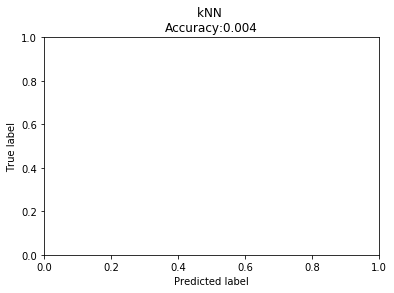

KNN for k =  9
[729 175  10 291 567  70 584 190 881 410 150 356 281 309 114 193 175 775
 353 211  91 134 521 121 448   9  70  97 138 291 694   8 214 736 401 103
 231 155 150 303 141 173 393 364 699 179 109 103   4  56  61 204 670 344
 344 658  86  65 481 748  52  30 154 200 374   9  68 179 561  17  78 379
  64  80 297  40  23  99 166 113 375 817 407 121 243 520  67  67 175 557
 448  67 414 403 136 178 136 355 700 488 212  35  33  30 282  85 119 183
 462 133 499 369 579 241 306 561 244  73 214  21 233 461 410  25 402  83
 280 273 739  69 575 143 477 558 552 171   5  35 308 372 369  94 263  32
  80 267   4 501 420 270 241 305 150  55 761 181 541  72  59 418 275 342
 163 463 281 397 431  18 632 167 349 542 503 169 102  84 165 202 106 178
 237 365 389  35  32 191  43 605 554  64 114 756 644 397 211 324  59 846
  40 220 216 218  86  62 306 300   1 132   8 298 653  67  68 294 164  61
 104 219  71 291 456  21 190 312 124 344  68 101 461 599  67 418  89 102
 146  89  81  96 263 165  72  90 141

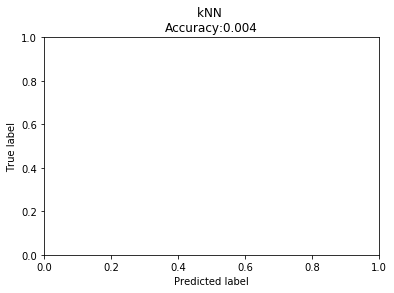

In [28]:
for k in n_neighbors:
    best_KNC = KNeighborsClassifier(algorithm='ball_tree', leaf_size=2, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                     weights='distance')
    
    best_KNC = best_KNC.fit(X_train, y_train)
    risk_predictor = best_KNC.predict(X_test)
    print("KNN for k = ", k)
    print(risk_predictor)

    cm = confusion_matrix(y_test, risk_predictor)
    plt.title('kNN \nAccuracy:{0:.3f}'.format(accuracy_score(y_test, risk_predictor)))
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

    #print(classification_report(y_test, risk_predictor))

In [76]:
print(classification_report(y_test, risk_predictor))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         2
          16       0.00      0.00      0.00         3
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         2
          19       0.00    

In [26]:
y_test.head()

6181    730
4382    177
6410    131
3149    290
6019    568
Name: PhaseTime, dtype: int64

In [32]:
y_train.head()

4579    374
5077    165
862       5
5944    493
4188    521
Name: PhaseTime, dtype: int64

In [27]:
X_test.head()

Vel       Acc  5_sec_Vel_mean  5_sec_Acc_mean  10_sec_Vel_mean  \
6181  30.280556  0.044444        11.38855         0.04154         11.38855   
4382  20.250912 -0.134112        18.40599         0.11302         18.40599   
6410   0.000000  0.000000         4.65194        -0.00000          4.65194   
3149  12.293600  0.000000         9.57762         0.01546          9.57762   
6019  16.416667 -0.133333         9.55053         0.02867          9.55053   

      10_sec_Acc_mean  30_sec_Vel_mean  30_sec_Acc_mean  60_sec_Vel_mean  \
6181          0.04154         11.38855          0.04154         11.38855   
4382          0.11302         18.40599          0.11302         18.40599   
6410         -0.00000          4.65194         -0.00000          4.65194   
3149          0.01546          9.57762          0.01546          9.57762   
6019          0.02867          9.55053          0.02867          9.55053   

      60_sec_Acc_mean  30_sec_Acc_min  30_sec_Acc_max  60_sec_Acc_min  \
6181          0.04154        -2.71111         2.87778        -2.71111   
4382          0.11302        -1.20701         1.43053        -1.20701   
6410         -0.00000        -1.47222         1.33333        -1.47222   
3149          0.01546        -1.47523         1.47523        -1.47523   
6019          0.02867        -2.71111         2.87778        -2.71111   

      60_sec_Acc_max  60_sec_Vel_iddle_count  
6181         2.87778                     0.0  
4382         1.43053                     0.0  
6410         1.33333                    33.0  
3149         1.47523                     1.0  
6019         2.87778                     0.0

In [30]:
X_train.shape, y_train.shape

((7272, 15), (7272,))

In [31]:
X_test.shape, y_test.shape

((808, 15), (808,))